In [1]:
# ============================
# 1. Importación de Librerías
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar el clasificador Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import pickle
from pathlib import Path
import time

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✓ Librerías importadas correctamente')
# Se asume que la salida aquí es: ✓ Librerías importadas correctamente

✓ Librerías importadas correctamente


In [2]:
print("Cargando datos...")

train_data = np.load('../../preprocesamiento/output/emnist_train_reduced.npz')
X_train = train_data['X_train']
y_train = train_data['y_train']

test_data = np.load('../../preprocesamiento/output/emnist_test_reduced.npz')
X_test = test_data['X_test']
y_test = test_data['y_test']

with open('../../preprocesamiento/class_mapping.pkl', 'rb') as f:
    class_mapping = pickle.load(f)

print("\n============================")
print("INFORMACIÓN DEL DATASET")
print("============================")
print(f"Train: {X_train.shape}")
print(f"Test:  {X_test.shape}")
print(f"Clases: {len(np.unique(y_train))}")
print("============================")

Cargando datos...

INFORMACIÓN DEL DATASET
Train: (697932, 61)
Test:  (116323, 61)
Clases: 62


In [20]:
# ==========================================
# 3. Entrenamiento del Modelo Random Forest
# ==========================================
# Random Forest Classifier
# Justificación del modelo:
# Mayor Precisión: A menudo logra una mayor exactitud en problemas complejos.
# Multiclase Nativo: Maneja las 62 clases automáticamente.
# Tolerancia al Overfitting: El ensamble de árboles (votación) reduce el riesgo de sobreajuste de los árboles individuales.
# Importancia de Features: Puede identificar qué features (componentes PCA) son más relevantes.

# Parámetros seleccionados:
# n_estimators=100: Usa 100 árboles. Un buen balance entre rendimiento y tiempo.
# max_depth=None: Permite que los árboles crezcan completamente (ajustar si se detecta sobreajuste).
# n_jobs=-1: Paralelización crucial usando todos los cores para acelerar el entrenamiento en el dataset grande (697K muestras).

print(f'\n{"="*60}')
print('ENTRENAMIENTO DEL MODELO')
print(f'{"="*60}')

model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=25,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Entrenar modelo
print('\nIniciando entrenamiento...\n')
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f'\n{"="*60}')
print('✓ ENTRENAMIENTO COMPLETADO')
print(f'{"="*60}')
print(f'Tiempo de entrenamiento: {training_time:.2f} segundos ({training_time/60:.2f} minutos)')
print(f'Número de clases: {len(model.classes_)}')
print(f'Número de features (PCA): {model.feature_importances_.shape[0]}')
print(f'{"="*60}')


ENTRENAMIENTO DEL MODELO

Iniciando entrenamiento...



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   46.4s



✓ ENTRENAMIENTO COMPLETADO
Tiempo de entrenamiento: 166.93 segundos (2.78 minutos)
Número de clases: 62
Número de features (PCA): 61


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


Generando predicciones...



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    5.9s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   22.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.3s finished


MÉTRICAS DE EVALUACIÓN

                 CONJUNTO DE ENTRENAMIENTO                  
------------------------------------------------------------
Accuracy:  0.9762 (97.62%)
Precision: 0.9781
Recall:    0.9762
F1-Score:  0.9754

                      CONJUNTO DE TEST                      
------------------------------------------------------------
Accuracy:  0.8148 (81.48%)
Precision: 0.7945
Recall:    0.8148
F1-Score:  0.7915

                 ANÁLISIS DE GENERALIZACIÓN                 
------------------------------------------------------------
Diferencia de accuracy: 0.1613 (16.13%)
⚠ Posible overfitting

REPORTE DE CLASIFICACIÓN DETALLADO (Test Set)

              precision    recall  f1-score   support

           0       0.64      0.81      0.72      5778
           1       0.65      0.92      0.76      6330
           2       0.84      0.97      0.90      5869
           3       0.95      0.97      0.96      5969
           4       0.88      0.95      0.91      5619
           

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.0s finished
C:\Users\andre\AppData\Local\Temp\ipykernel_6084\455635243.py:197: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(



ESTADÍSTICAS DE CONFIANZA

Predicciones Correctas:
  Media:    0.7220
  Mediana:  0.7584
  Std:      0.2222
  Min:      0.0701
  Max:      0.9992

Predicciones Incorrectas:
  Media:    0.4628
  Mediana:  0.4605
  Std:      0.1968
  Min:      0.0588
  Max:      0.9979


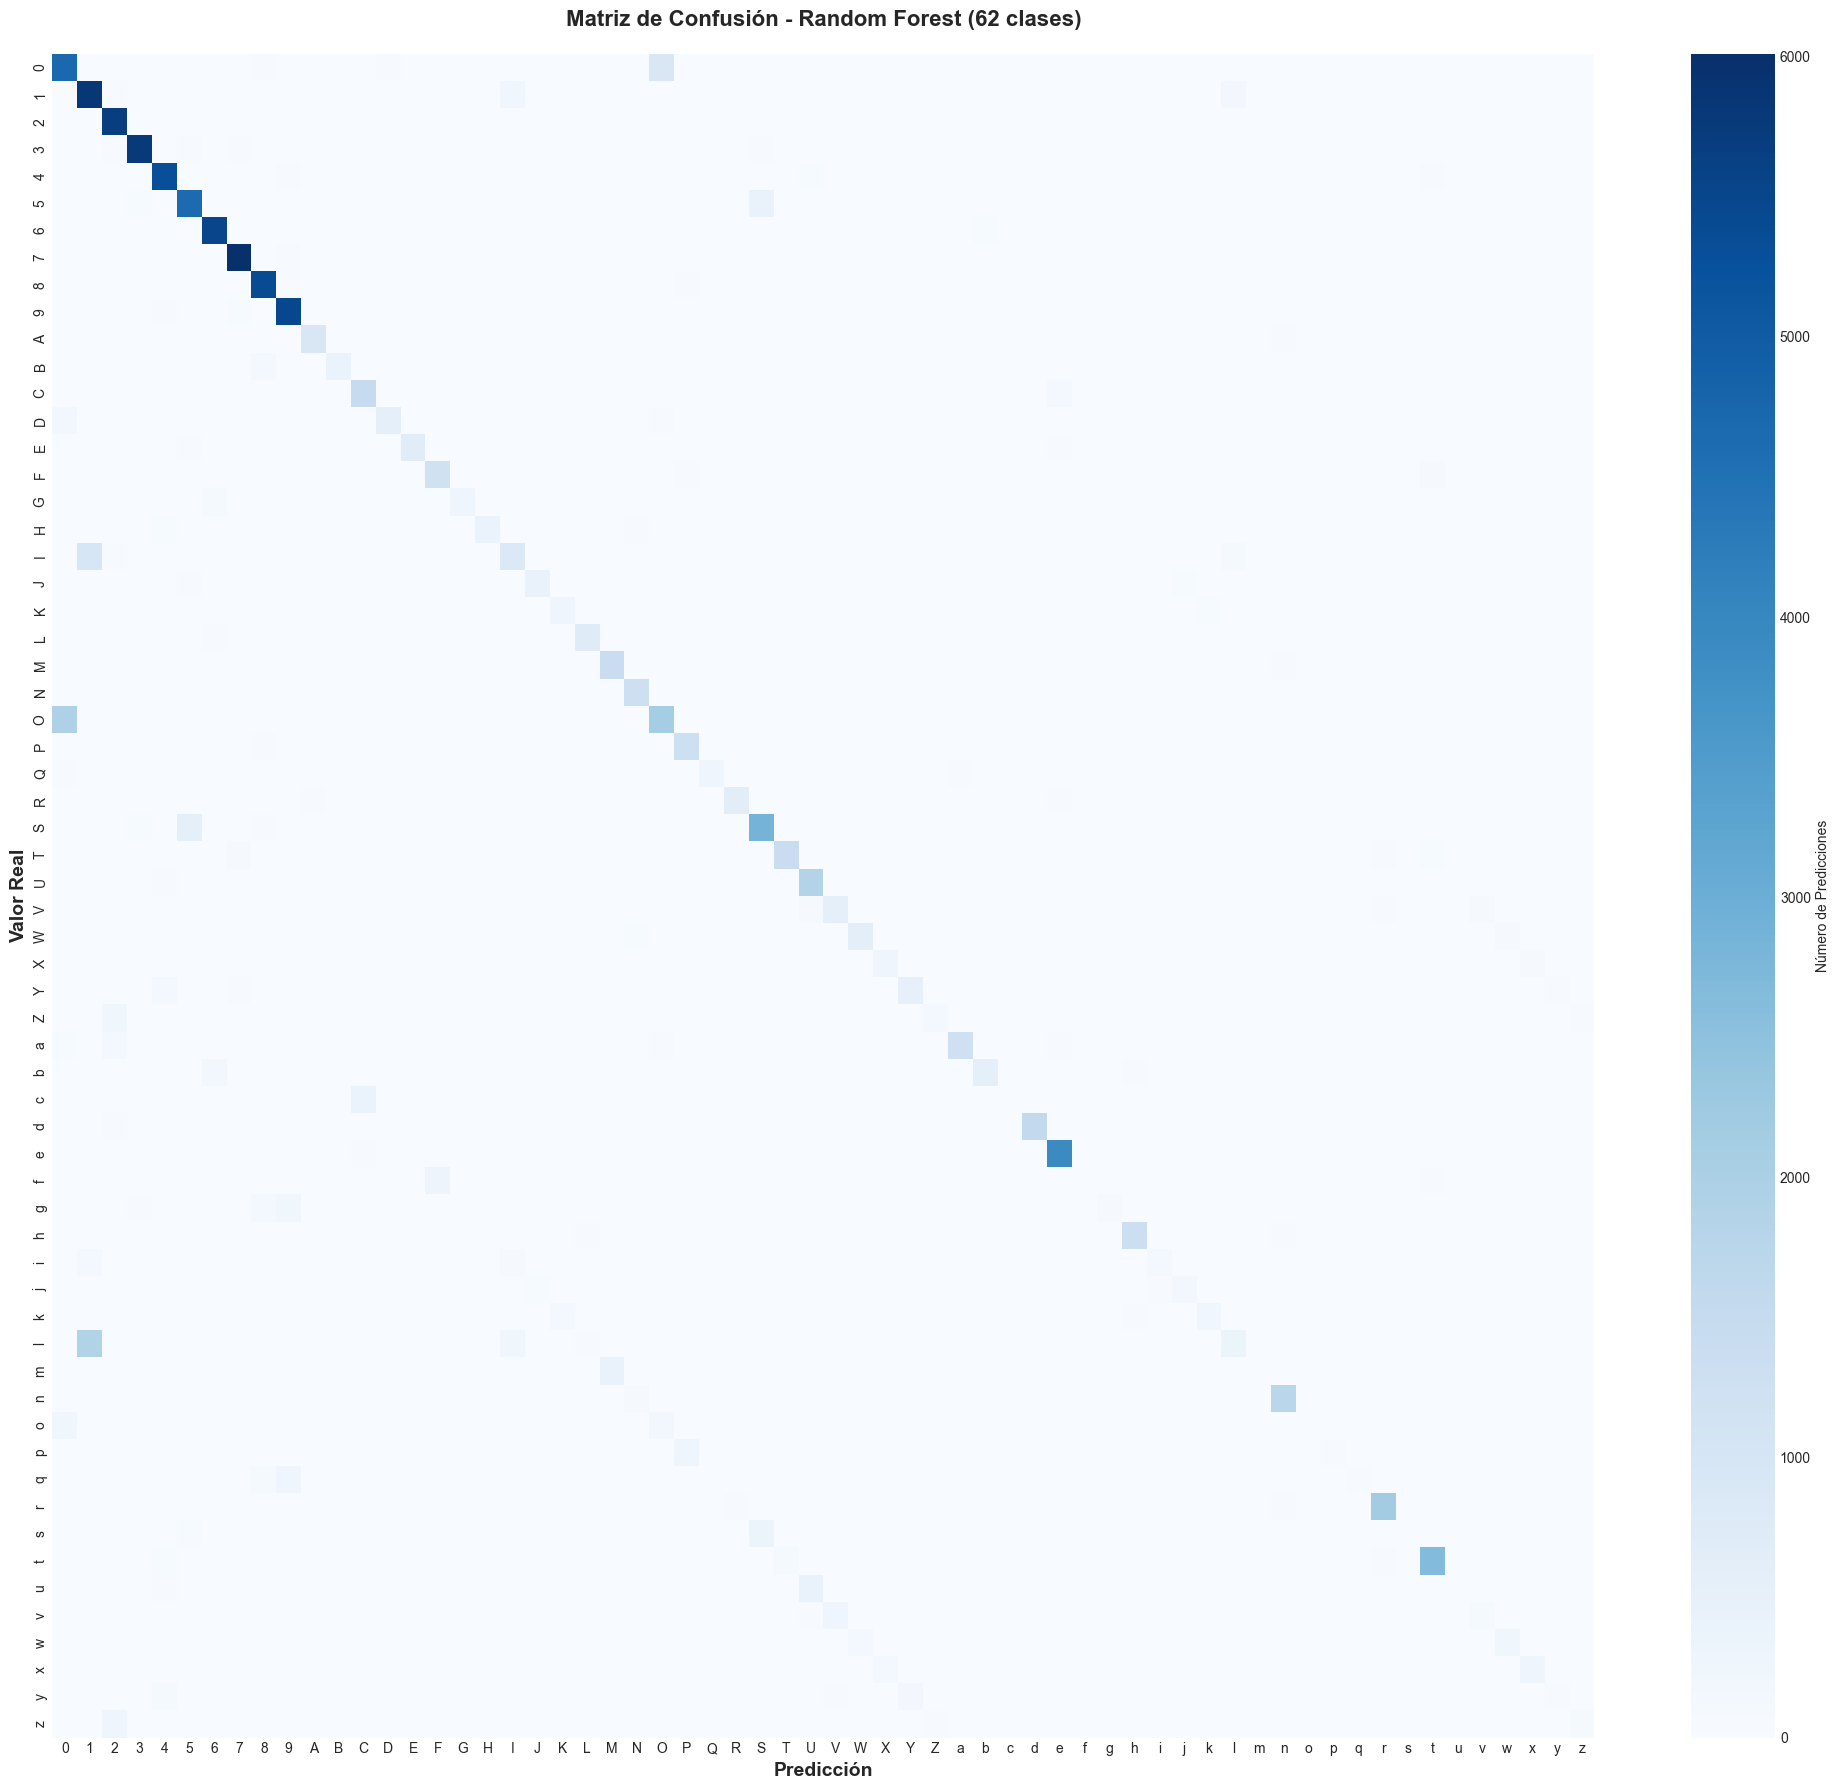

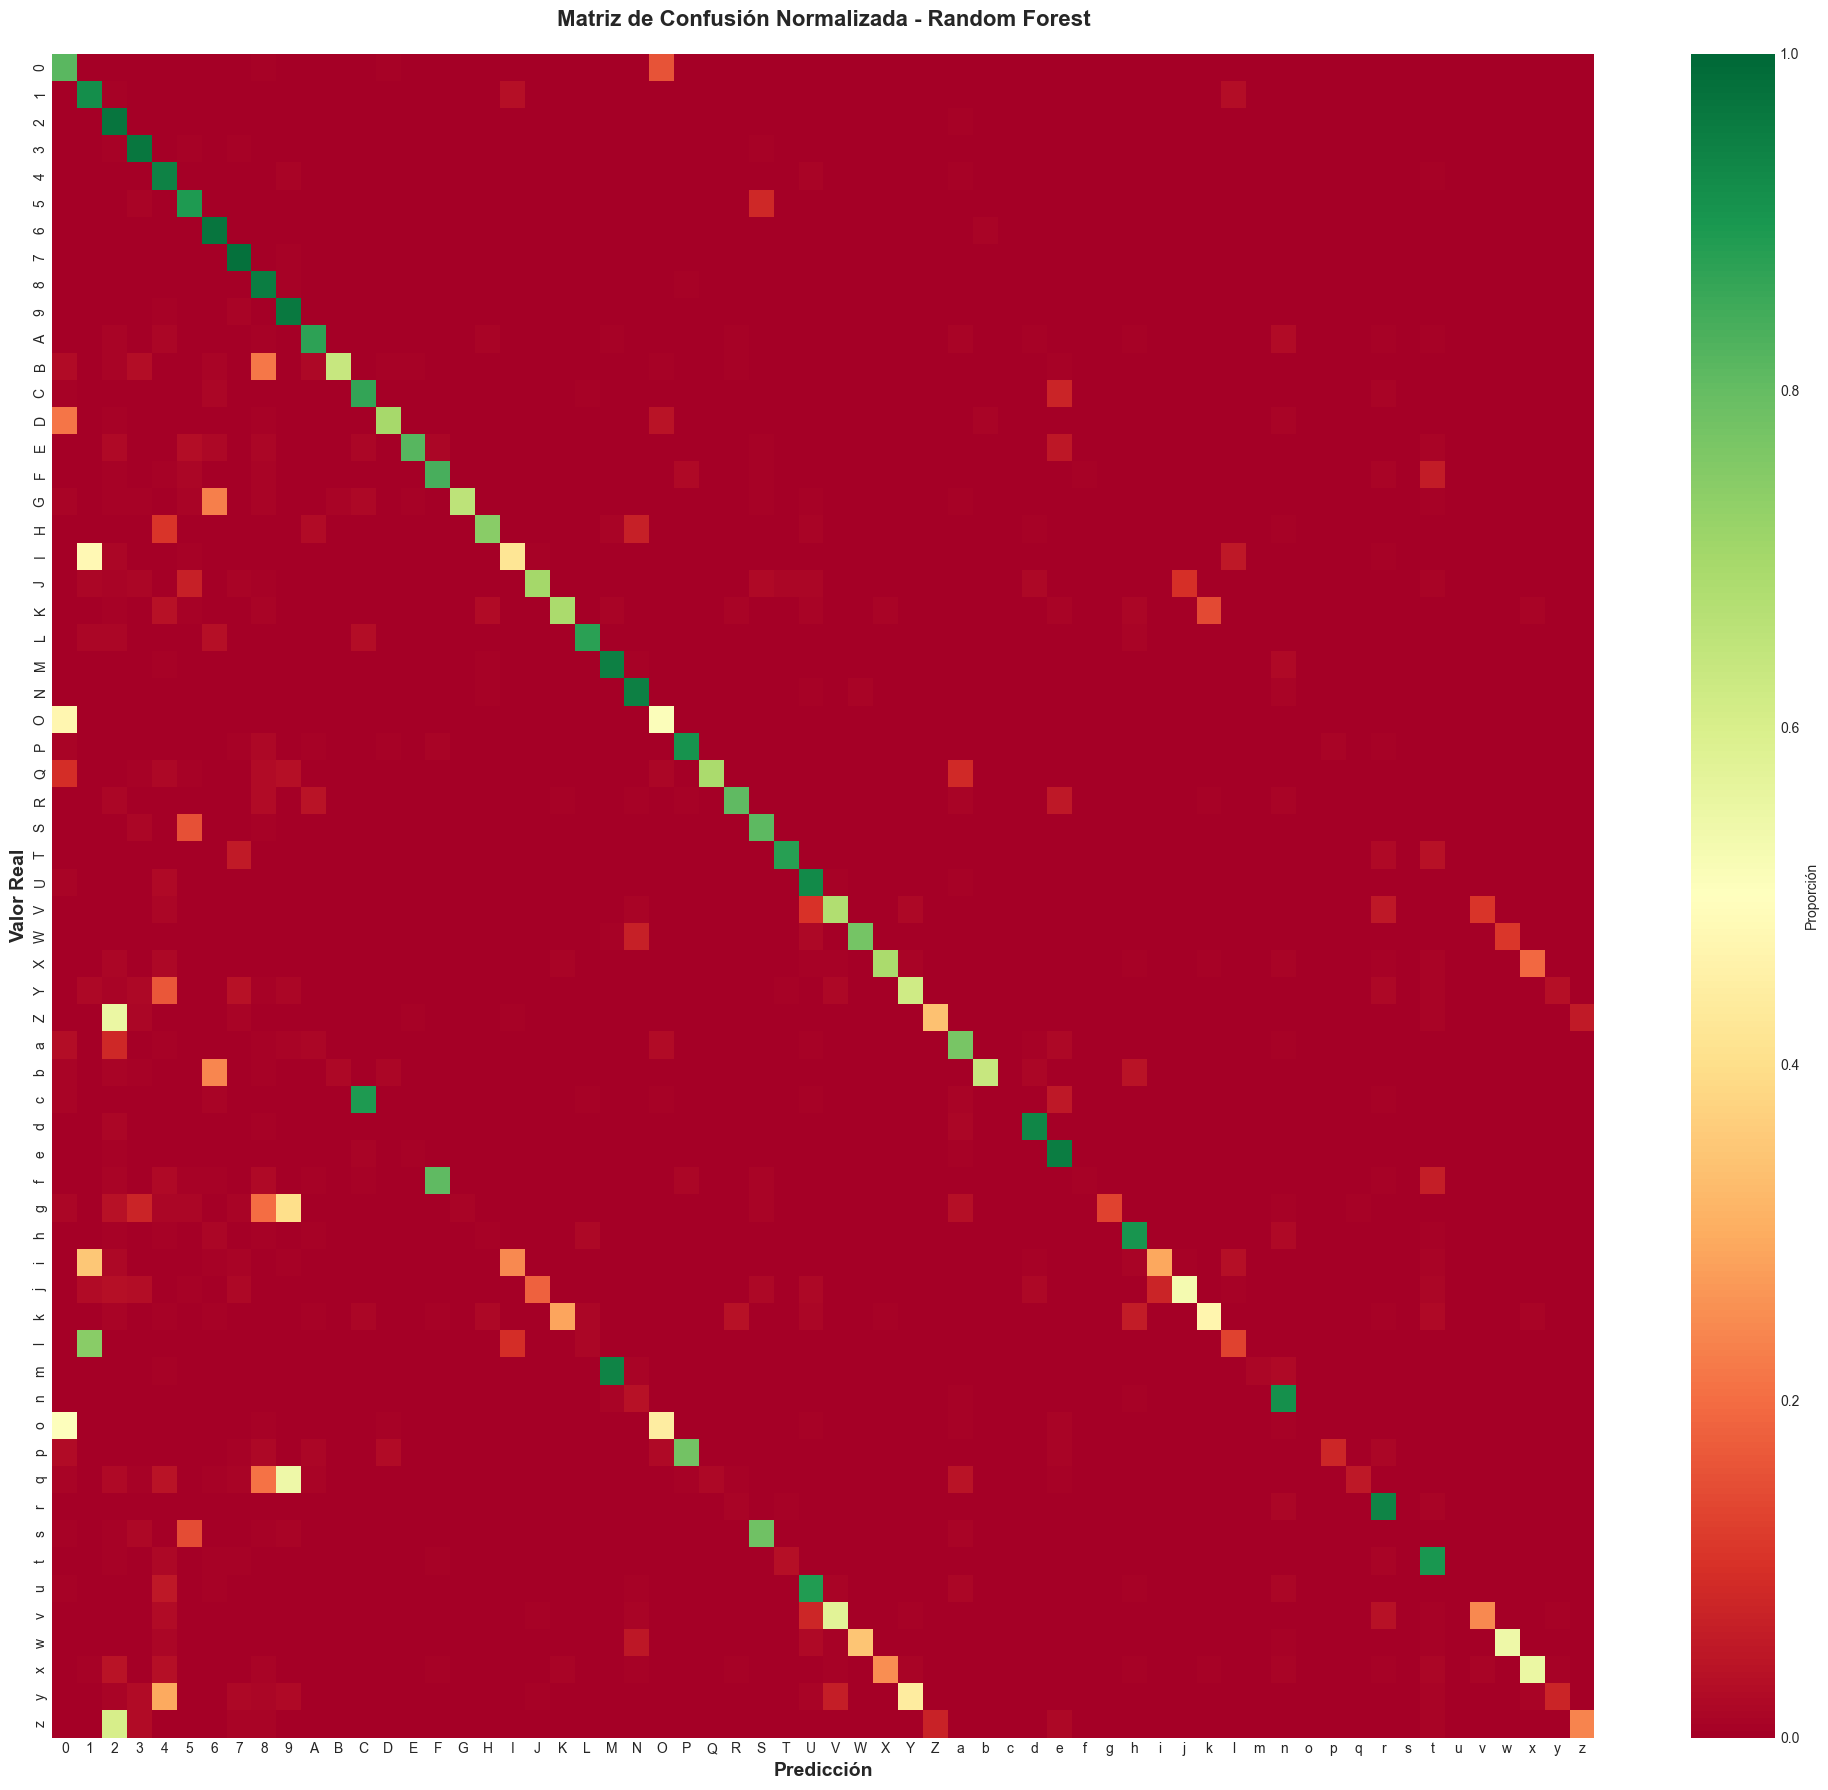

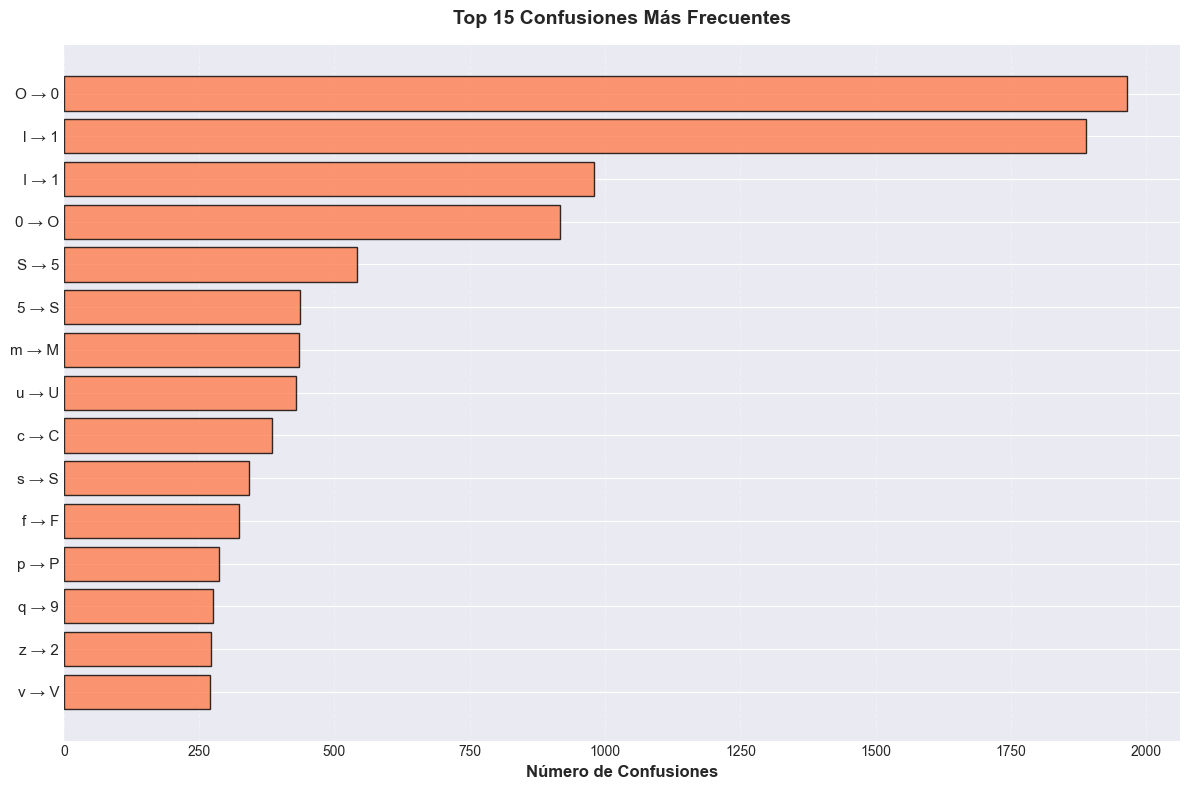

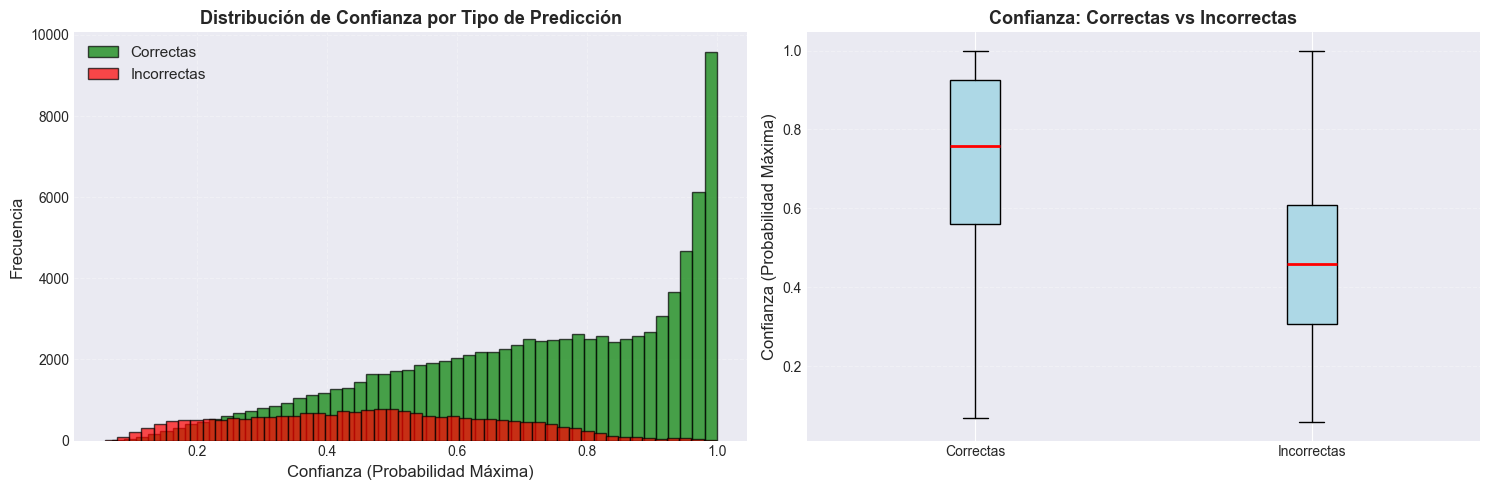

In [21]:
# ============================
# 4. Evaluación del Modelo
# ============================
# 4.1 Métricas Globales
print('Generando predicciones...\n')
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

# Calcular métricas para test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Mostrar resultados
print(f'{"="*60}')
print('MÉTRICAS DE EVALUACIÓN')
print(f'{"="*60}')
print(f'\n{"CONJUNTO DE ENTRENAMIENTO":^60}')
print(f'{"":-^60}')
print(f'Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
print(f'Precision: {train_precision:.4f}')
print(f'Recall:    {train_recall:.4f}')
print(f'F1-Score:  {train_f1:.4f}')

print(f'\n{"CONJUNTO DE TEST":^60}')
print(f'{"":-^60}')
print(f'Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'Precision: {test_precision:.4f}')
print(f'Recall:    {test_recall:.4f}')
print(f'F1-Score:  {test_f1:.4f}')

# Análisis de generalización
diff_accuracy = abs(train_accuracy - test_accuracy)
print(f'\n{"ANÁLISIS DE GENERALIZACIÓN":^60}')
print(f'{"":-^60}')
print(f'Diferencia de accuracy: {diff_accuracy:.4f} ({diff_accuracy*100:.2f}%)')

if diff_accuracy < 0.02:
    print('✓ Excelente generalización')
elif diff_accuracy < 0.05:
    print('✓ Buena generalización')
else:
    print('⚠ Posible overfitting')
print(f'{"="*60}')


# 4.2 Reporte de Clasificación por Clase
target_names = [class_mapping[i] for i in sorted(class_mapping.keys())]

print(f'\n{"="*80}')
print('REPORTE DE CLASIFICACIÓN DETALLADO (Test Set)')
print(f'{"="*80}\n')

report = classification_report(y_test, y_test_pred, target_names=target_names, zero_division=0)
print(report)

# Convertir a DataFrame para análisis
report_dict = classification_report(
    y_test, y_test_pred, 
    target_names=target_names, 
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose()

# Clases con mejor rendimiento
print(f'\n{"="*80}')
print('TOP 10 CLASES CON MEJOR F1-SCORE')
print(f'{"="*80}')
best_classes = report_df.iloc[:-3].sort_values('f1-score', ascending=False).head(10)
print(best_classes[['precision', 'recall', 'f1-score', 'support']].to_string())

# Clases con peor rendimiento
print(f'\n{"="*80}')
print('TOP 10 CLASES CON PEOR F1-SCORE')
print(f'{"="*80}')
worst_classes = report_df.iloc[:-3].sort_values('f1-score', ascending=True).head(10)
print(worst_classes[['precision', 'recall', 'f1-score', 'support']].to_string())


# 4.3 Matriz de Confusión
cm = confusion_matrix(y_test, y_test_pred)

# Visualizar matriz de confusión completa (requiere ejecución de la celda)
plt.figure(figsize=(20, 18))
sns.heatmap(
    cm, 
    annot=False, 
    fmt='d', 
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    cbar_kws={'label': 'Número de Predicciones'}
)
plt.xlabel('Predicción', fontsize=14, weight='bold')
plt.ylabel('Valor Real', fontsize=14, weight='bold')
plt.title('Matriz de Confusión - Random Forest (62 clases)', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
# plt.show() # Descomentar para visualizar en el notebook

# Matriz de confusión normalizada (requiere ejecución de la celda)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 18))
sns.heatmap(
    cm_normalized,
    annot=False,
    fmt='.2f',
    cmap='RdYlGn',
    xticklabels=target_names,
    yticklabels=target_names,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Proporción'}
)
plt.xlabel('Predicción', fontsize=14, weight='bold')
plt.ylabel('Valor Real', fontsize=14, weight='bold')
plt.title('Matriz de Confusión Normalizada - Random Forest', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
# plt.show() # Descomentar para visualizar en el notebook


# 4.4 Análisis de Errores
confusion_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append({
                'Real': target_names[i],
                'Predicho': target_names[j],
                'Cantidad': cm[i, j],
                'Proporción': f"{cm_normalized[i, j]:.2%}"
            })

confusion_df = pd.DataFrame(confusion_pairs).sort_values('Cantidad', ascending=False)

print(f'\n{"="*80}')
print('TOP 20 CONFUSIONES MÁS FRECUENTES')
print(f'{"="*80}\n')
print(confusion_df.head(20).to_string(index=False))

# Visualizar top confusiones (requiere ejecución de la celda)
plt.figure(figsize=(12, 8))
top_confusions = confusion_df.head(15)
labels = [f"{row['Real']} → {row['Predicho']}" for _, row in top_confusions.iterrows()]
values = top_confusions['Cantidad'].values

plt.barh(range(len(labels)), values, color='coral', alpha=0.8, edgecolor='black')
plt.yticks(range(len(labels)), labels, fontsize=11)
plt.xlabel('Número de Confusiones', fontsize=12, weight='bold')
plt.title('Top 15 Confusiones Más Frecuentes', fontsize=14, weight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
# plt.show() # Descomentar para visualizar en el notebook

# Análisis de patrones
print(f'\n{"="*80}')
print('PATRONES COMUNES DE ERROR')
print(f'{"="*80}')
print('Confusiones típicas en clasificación de caracteres (ejemplos):')
print('  • O (letra) ↔ 0 (cero): Similitud visual')
print('  • I (mayúscula) ↔ l (L minúscula) ↔ 1 (uno): Formas lineales')
print('  • S ↔ 5: Curvatura similar')
print('  • Mayúsculas ↔ Minúsculas: C/c, O/o, S/s, etc.')
print(f'{"="*80}')


# 4.5 Distribución de Confianza
y_test_proba = model.predict_proba(X_test)
max_probas = np.max(y_test_proba, axis=1)

correct_mask = y_test == y_test_pred
correct_probas = max_probas[correct_mask]
incorrect_probas = max_probas[~correct_mask]

# Visualizar distribución (requiere ejecución de la celda)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histograma general
ax1.hist(correct_probas, bins=50, alpha=0.7, label='Correctas', color='green', edgecolor='black')
ax1.hist(incorrect_probas, bins=50, alpha=0.7, label='Incorrectas', color='red', edgecolor='black')
ax1.set_xlabel('Confianza (Probabilidad Máxima)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_title('Distribución de Confianza por Tipo de Predicción', fontsize=13, weight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3, linestyle='--')

# Box plot comparativo
ax2.boxplot(
    [correct_probas, incorrect_probas],
    labels=['Correctas', 'Incorrectas'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', edgecolor='black'),
    medianprops=dict(color='red', linewidth=2)
)
ax2.set_ylabel('Confianza (Probabilidad Máxima)', fontsize=12)
ax2.set_title('Confianza: Correctas vs Incorrectas', fontsize=13, weight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
# plt.show() # Descomentar para visualizar en el notebook

# Estadísticas
print(f'\n{"="*60}')
print('ESTADÍSTICAS DE CONFIANZA')
print(f'{"="*60}')
print(f'\nPredicciones Correctas:')
print(f'  Media:    {correct_probas.mean():.4f}')
print(f'  Mediana:  {np.median(correct_probas):.4f}')
print(f'  Std:      {correct_probas.std():.4f}')
print(f'  Min:      {correct_probas.min():.4f}')
print(f'  Max:      {correct_probas.max():.4f}')

print(f'\nPredicciones Incorrectas:')
print(f'  Media:    {incorrect_probas.mean():.4f}')
print(f'  Mediana:  {np.median(incorrect_probas):.4f}')
print(f'  Std:      {incorrect_probas.std():.4f}')
print(f'  Min:      {incorrect_probas.min():.4f}')
print(f'  Max:      {incorrect_probas.max():.4f}')
print(f'{"="*60}')

In [22]:
# =======================================
# 5. Guardar Modelo y Componentes
# =======================================

# Crear directorio de salida
output_dir = Path('output')
output_dir.mkdir(exist_ok=True)

print(f'{"="*60}')
print('GUARDANDO MODELO Y COMPONENTES')
print(f'{"="*60}\n')

# Guardar modelo (¡Nombre de archivo actualizado!)
model_path = output_dir / 'random_forest_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f'✓ Modelo guardado: {model_path}')

# Guardar mapeo de clases
mapping_path = output_dir / 'class_mapping.pkl'
with open(mapping_path, 'wb') as f:
    pickle.dump(class_mapping, f)
print(f'✓ Mapeo guardado: {mapping_path}')

# Guardar métricas (se asume que la estructura de métricas es la misma)
metrics = {
    'train_accuracy': float(train_accuracy),
    'train_precision': float(train_precision),
    'train_recall': float(train_recall),
    'train_f1': float(train_f1),
    'test_accuracy': float(test_accuracy),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_f1': float(test_f1),
    'training_time': float(training_time),
    'n_components': X_train.shape[1],
    'n_classes': int(len(model.classes_)),
    'n_samples_train': int(len(y_train)),
    'n_samples_test': int(len(y_test))
}
metrics_path = output_dir / 'metrics.pkl'
with open(metrics_path, 'wb') as f:
    pickle.dump(metrics, f)
print(f'✓ Métricas guardadas: {metrics_path}')

print(f'\n{"="*60}')
print('✓ TODOS LOS ARCHIVOS GUARDADOS EXITOSAMENTE')
print(f'{"="*60}')
print('\nArchivos generados:')
print('  1. random_forest_model.pkl - Modelo entrenado')
print('  2. class_mapping.pkl - Mapeo de clases')
print('  3. metrics.pkl - Métricas de evaluación')
print('\n✓ Listos para usar en la interfaz gráfica')
print(f'{"="*60}')

GUARDANDO MODELO Y COMPONENTES

✓ Modelo guardado: output\random_forest_model.pkl
✓ Mapeo guardado: output\class_mapping.pkl
✓ Métricas guardadas: output\metrics.pkl

✓ TODOS LOS ARCHIVOS GUARDADOS EXITOSAMENTE

Archivos generados:
  1. random_forest_model.pkl - Modelo entrenado
  2. class_mapping.pkl - Mapeo de clases
  3. metrics.pkl - Métricas de evaluación

✓ Listos para usar en la interfaz gráfica


In [23]:
# ============================
# 6. Resumen Final
# ============================
print(f'{"="*80}')
print('RESUMEN FINAL - RANDOM FOREST CLASSIFIER')
print(f'{"="*80}')

print(f'\n{"CONFIGURACIÓN DEL MODELO":^80}')
print(f'{"-"*80}')
print(f'  Algoritmo:        Random Forest Classifier (Ensamble)')
print(f'  N° de Árboles:    {model.get_params()["n_estimators"]}')
print(f'  Criterio:         {model.get_params()["criterion"]}')
print(f'  Clases:           {len(model.classes_)} (0-9, A-Z, a-z)')
print(f'  Features (PCA):   {X_train.shape[1]}')

print(f'\n{"DATASET":^80}')
print(f'{"-"*80}')
print(f'  Train:            {len(y_train):,} muestras')
print(f'  Test:             {len(y_test):,} muestras')

print(f'\n{"RENDIMIENTO (TEST SET)":^80}')
print(f'{"-"*80}')
print(f'  Accuracy:         {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'  Precision:        {test_precision:.4f}')
print(f'  Recall:           {test_recall:.4f}')
print(f'  F1-Score:         {test_f1:.4f}')
print(f'  Tiempo:           {training_time:.2f}s ({training_time/60:.2f} min)')

print(f'\n{"JUSTIFICACIÓN":^80}')
print(f'{"-"*80}')
print('  ✓ Mayor precisión potencial que modelos lineales como la Regresión Logística.')
print('  ✓ Resistencia al sobreajuste (overfitting) debido al método de ensamble (bagging).')
print('  ✓ Manejo nativo y robusto de problemas de clasificación multiclase (62 clases).')
print('  ✓ Proporciona importancia de features, permitiendo un análisis más profundo.')

print(f'\n{"="*80}')
print('✓ MODELO RANDOM FOREST LISTO PARA PRODUCCIÓN')
print(f'{"="*80}')
print('\nPróximos pasos:')
print('  → Analizar la ganancia de precisión en comparación con la Regresión Logística.')
print('  → Ejecutar: python graphic-interface/character_recognizer_gui.py')
print(f'\n{"="*80}')

RESUMEN FINAL - RANDOM FOREST CLASSIFIER

                            CONFIGURACIÓN DEL MODELO                            
--------------------------------------------------------------------------------
  Algoritmo:        Random Forest Classifier (Ensamble)
  N° de Árboles:    100
  Criterio:         gini
  Clases:           62 (0-9, A-Z, a-z)
  Features (PCA):   61

                                    DATASET                                     
--------------------------------------------------------------------------------
  Train:            697,932 muestras
  Test:             116,323 muestras

                             RENDIMIENTO (TEST SET)                             
--------------------------------------------------------------------------------
  Accuracy:         0.8148 (81.48%)
  Precision:        0.7945
  Recall:           0.8148
  F1-Score:         0.7915
  Tiempo:           166.93s (2.78 min)

                                 JUSTIFICACIÓN                          